### Import

In [1]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
from timeit import default_timer as time
from scipy.interpolate import griddata
from scipy import interpolate, signal
import pickle as pickle
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

### Observed Grid and Data

In [2]:
with open('synthetic_regular_tf.pickle', 'rb') as r:
    synthetic_regular_tf = pickle.load(r)

with open('synthetic_irregular_20_tf.pickle', 'rb') as r:
    synthetic_irregular_20_tf = pickle.load(r)

with open('synthetic_irregular_30_tf.pickle', 'rb') as r:
    synthetic_irregular_30_tf = pickle.load(r)

with open('synthetic_irregular_z05_tf.pickle', 'rb') as r:
    synthetic_irregular_z05_tf = pickle.load(r)

with open('synthetic_irregular_z10_tf.pickle', 'rb') as r:
    synthetic_irregular_z10_tf = pickle.load(r)

In [3]:
xi_plot = synthetic_regular_tf['x']
yi_plot = synthetic_regular_tf['y']
zi = synthetic_regular_tf['z']
tf = synthetic_regular_tf['tf']
shape = (100, 50)
N = shape[0]*shape[1]

In [4]:
print (1)
print (np.mean(np.abs(synthetic_regular_tf['delta_tf'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_regular_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf_bccb'])))
print()
print(2)
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf_bccb'])))
print()
print(3)
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf_bccb'])))
print()
print(4)
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf_bccb'])))
print()
print(5)
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf_bccb'])))

1
0.3657111172916805
0.2760633908188021

0.5621162240335814
0.5200593952085233

2
0.3666936536155318
0.277959864805565

0.8428089842800784
0.6941069277046888

3
0.36717286111473224
0.27862575592068456

1.126292857934078
0.9013442467933871

4
0.3790077206183641
0.29853047361520135

1.1487103875273281
1.095988834812617

5
0.3994564173901226
0.3453779643477144

1.8105091679701575
1.838689336411518


In [5]:
scale_max = np.max(synthetic_irregular_z10_tf['delta_tf_bccb'])
scale_min = np.min(synthetic_irregular_z10_tf['delta_tf_bccb'])
print (scale_min, scale_max)
scale_max = 13.
scale_min = -17.

-18.965566724862768 11.901716992008666


### Plot of the Figure 2 synthetic data

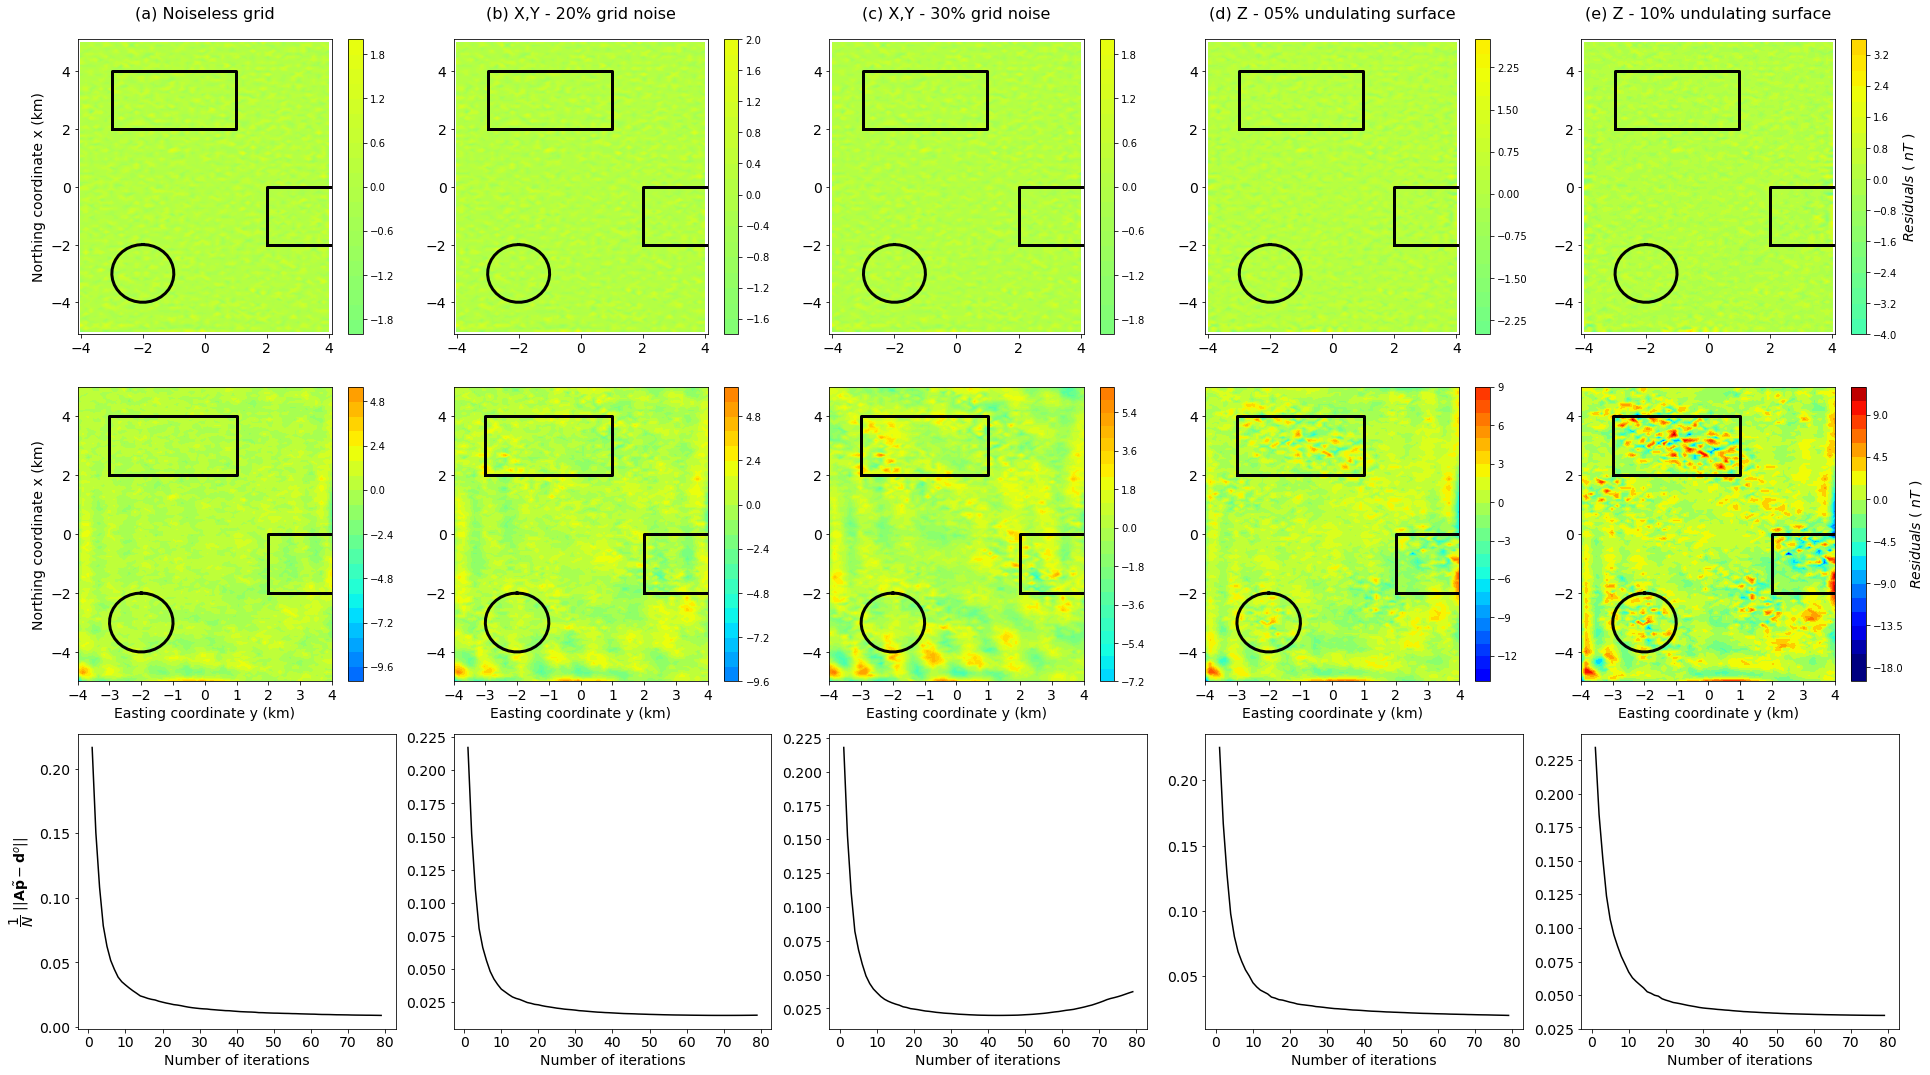

In [6]:
#Projection_model 
R = 1000 #Radius
xc, yc, zc = -3000.,-2000.,2000. #Center of sphere
phi = np.linspace(0, 2.*np.pi, 36)  #36 points
x = xc/1000 + R/1000*np.cos(phi)
y = yc/1000 + R/1000*np.sin(phi)

x_p = [-3., -3, 1, 1, -3.]
y_p = [2., 4, 4, 2, 2.]

x_p2 = [2, 2, 6, 6, 2]
y_p2 = [-2, 0, 0, -2, -2.]

fig = plt.figure(figsize=(27,15))
fig.patch.set_facecolor('xkcd:white')

plt.subplot(351)
plt.title('(a) Noiseless grid', y=1.05, x=0.5, fontsize=16)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot)-0.1,np.max(yi_plot)+0.1)
plt.ylim(np.min(xi_plot)-0.1,np.max(xi_plot)+0.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(356)
#plt.title('(b)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,11)
#plt.title('(c)', y=0.91, x=-0.16, fontsize=14)
plt.plot(synthetic_regular_tf['itmax'], synthetic_regular_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=14)
plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=14)
#plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(352)
plt.title('(b) X,Y - 20% grid noise', y=1.05, x=0.5, fontsize=16)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot)-0.1,np.max(yi_plot)+0.1)
plt.ylim(np.min(xi_plot)-0.1,np.max(xi_plot)+0.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(357)
#plt.title('(e)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,12)
#plt.title('(f)', y=0.91, x=-0.15, fontsize=14)
plt.plot(synthetic_irregular_20_tf['itmax'], synthetic_irregular_20_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=14)
#plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=14)
#plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(353)
plt.title('(c) X,Y - 30% grid noise', y=1.05, x=0.5, fontsize=16)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot)-0.1,np.max(yi_plot)+0.1)
plt.ylim(np.min(xi_plot)-0.1,np.max(xi_plot)+0.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(358)
#plt.title('(h)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,13)
#plt.title('(i)', y=0.91, x=-0.15, fontsize=14)
plt.plot(synthetic_irregular_30_tf['itmax'], synthetic_irregular_30_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=14)
#plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=14)
#plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,4)
plt.title('(d) Z - 05% undulating surface', y=1.05, x=0.5, fontsize=16)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot)-0.1,np.max(yi_plot)+0.1)
plt.ylim(np.min(xi_plot)-0.1,np.max(xi_plot)+0.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,9)
#plt.title('(k)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,14)
#plt.title('(l)', y=0.91, x=-0.15, fontsize=14)
plt.plot(synthetic_irregular_z05_tf['itmax'], synthetic_irregular_z05_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=14)
#plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=14)
#plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,5)
plt.title('(e) Z - 10% undulating surface', y=1.05, x=0.5, fontsize=16)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot)-0.1,np.max(yi_plot)+0.1)
plt.ylim(np.min(xi_plot)-0.1,np.max(xi_plot)+0.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,10)
#plt.title('(n)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,15)
#plt.title('(o)', y=0.91, x=-0.15, fontsize=14)
plt.plot(synthetic_irregular_z10_tf['itmax'], synthetic_irregular_z10_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=14)
#plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=14)
#plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.tight_layout()
plt.savefig('figures/synthetic_residuals_convergence_comparison_v2.png', dpi=300)